In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import tools

In [2]:
hdul=fits.open("advact_tt_patch.fits")
mymap=hdul[0].data
hdul.close()
mymap=np.asarray(mymap,dtype='float')

In [3]:
nx,ny = mymap.shape
width=10

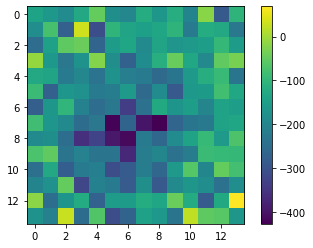

In [4]:
plt.imshow(mymap[nx//2-width-2+3:nx//2+width-2-3,ny//2-width-2+4:ny//2+width-2-2],aspect='equal')
plt.colorbar()

In [5]:
ss=mymap[nx//2-width-2+3:nx//2+width-2-3,ny//2-width-2+4:ny//2+width-2-2].copy()
print(ss.shape)

(14, 14)


In [6]:
snip=ss.copy()

In [7]:
snip = (snip-np.max(snip))/(np.max(snip)-np.min(snip))

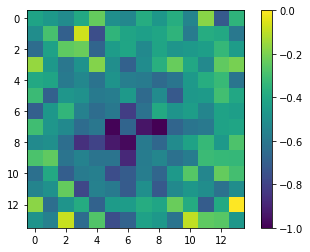

In [8]:
plt.imshow(snip,aspect='equal')
plt.colorbar()

In [7]:
width=ss.shape[0]//2

In [8]:
params = [-1,1,-1,3,5]
mygauss = tools.gauss2d(params,width)

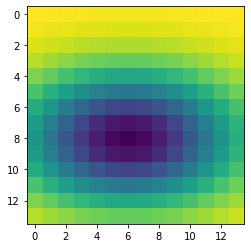

In [9]:
plt.imshow(mygauss,aspect='equal')

In [11]:
dp = np.asarray([0.001,0.001,0.001,0.001,0.001])/10
# params = [-400,1,-2,4]
params = [-1,1,-1,3,5]
#let's fit a gaussian to snip
y=np.ravel(snip)
# width=5
print(y.shape)
fitp,pcov=tools.fit_lm(tools.gauss2d,params,y,dp,width,lmbda=10,niter=50000,rtol=1e-8)

(196,)
init pars are: [-1, 1, -1, 3, 5]
yep
5 len pars
on iteration  0  chisq is  7658786.512572496  taking step  [-274.09442708  -22.72216921   -6.62489763  132.39545942   25.77045316] with lambda  10
5 len pars
step accepted. new m is [-274.09442708  -22.72216921   -6.62489763  132.39545942   25.77045316]
on iteration  1  chisq is  2744005.135615076  taking step  [-190.86077048  -33.24576796   16.51989091  132.42046582  -38.65227433] with lambda  6.666666666666667
5 len pars
step accepted. new m is [-190.86077048  -33.24576796   16.51989091  132.42046582  -38.65227433]
on iteration  2  chisq is  1562221.4875600683  taking step  [-139.41690869  -35.29276718   -8.22000156  134.7917322   -50.93926774] with lambda  4.444444444444445
5 len pars
step rejected. old m is [-190.86077048  -33.24576796   16.51989091  132.42046582  -38.65227433]
on iteration  3  chisq is  1562221.4875600683  taking step  [-237.29531694  -14.75558783    3.13168719  138.3989173   -22.69580384] with lambda  8.88888

step accepted. new m is [-271.41225315   22.43450292   -1.35054651   36.59387423   -5.84090619]
on iteration  120  chisq is  1219525.709175459  taking step  [-270.55406842   21.64481246   -1.35021789   35.69249226   -5.83583933] with lambda  65.55814106414634
5 len pars
step accepted. new m is [-270.55406842   21.64481246   -1.35021789   35.69249226   -5.83583933]
on iteration  121  chisq is  1219217.4698515746  taking step  [-269.05897182   20.46912428   -1.34974855   34.40194812   -5.82876663] with lambda  43.70542737609756
5 len pars
step accepted. new m is [-269.05897182   20.46912428   -1.34974855   34.40194812   -5.82876663]
on iteration  122  chisq is  1218703.5515475615  taking step  [-266.3668693    18.65904217   -1.34905433   32.49557826   -5.81883902] with lambda  29.13695158406504
5 len pars
step accepted. new m is [-266.3668693    18.65904217   -1.34905433   32.49557826   -5.81883902]
on iteration  123  chisq is  1217745.0325130927  taking step  [-261.25287031   15.6297478

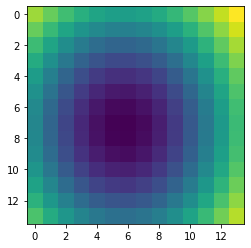

In [26]:
mygauss = tools.gauss2d(fitp,width)
plt.imshow(mygauss,aspect='equal')

0.15036547486172017 stddev of resiudals


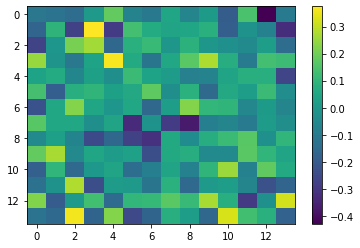

In [27]:
predsnip = tools.gauss2d(fitp,width)
res=snip-predsnip
print(res.std(), "stddev of resiudals")
plt.imshow(res,aspect='auto')
plt.colorbar()


81.03105330674161

## Adding a rotation will help. but residual RMS (60) are lower than signal level (300) in the map.